# Library and Data Imports and Standardization

In [223]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report, accuracy_score, f1_score, r2_score, root_mean_squared_error

# Import pprint
from pprint import pprint

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
dynamically_generated_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')
us_elections_2020_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_final.csv')
mlma_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/MLMA_hate_speech_final.csv')

In [225]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [227]:
dynamically_generated_hate_speech.head()

,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,0,16,0,0,0,0,0,0,0,0,1,1
1,1.0,-1,9,0,0,0,0,0,0,1,0,0,1
2,1.0,-1,16,1,0,0,0,0,0,0,0,0,1
3,1.0,0,2,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,17,1,0,0,0,0,0,0,0,0,1


In [228]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [229]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [230]:
oaa_X = online_abusive_attacks.drop("Toxicity", axis=1)
oaa_y = online_abusive_attacks["Toxicity"]

In [231]:
us_elections_2020_hate_speech.head()

,index,Trump,Biden,HOF
0,873,1.0,4.0,1
1,2947,0.0,3.0,1
2,2274,0.0,4.0,1
3,902,1.0,4.0,1
4,554,4.0,1.0,1


In [232]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [233]:
mlma_hate_speech.head()

,HITId,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,hateful_sentiment,normal_sentiment,offensive_sentiment,disrespectful_sentiment,abusive_sentiment,fearful_sentiment,target_group
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
mlma_hate_speech_X = mlma_hate_speech.drop("target_group", axis=1)
mlma_hate_speech_y = mlma_hate_speech["target_group"]

# Linear Modeling

In [235]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
oaa_X_numeric = oaa_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)

In [236]:
# Use standard scaler on the Convabuse data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [237]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [238]:
# Use standard scaler on the Online Abusive Attacks X data
oaa_scaler = StandardScaler()
oaa_X_scaled = oaa_scaler.fit_transform(oaa_X_numeric)
oaa_X_scaled = pd.DataFrame(oaa_X_scaled, columns=oaa_X_numeric.columns)

In [239]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [240]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [241]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, oaa_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['type', 'annotator', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['index', 'Trump', 'Biden'], dtype='object')
        HITId  directness  shock_annotator_sentiment  \
0           0           0                          0   
1           0           0                          0   
2           0           0                          0   
3           0           0                          0   
4           0           0                          0   
...       ...         ...                        ...   
218588     

In [242]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
oaa_X_train, oaa_X_test, oaa_y_train, oaa_y_test = train_test_split(oaa_X_scaled, oaa_y, test_size=0.2, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)

In [243]:
svm_classification_results_list = []
svm_regression_results_list = []

## Convabuse Support Vector Machines

In [23]:
# Use grid search to find the best hyperparameters for the Linear SVC model
convabuse_svm_linear_param_grid = {
    'C': [1.0], # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': range(10, 20), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [24]:
convabuse_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), convabuse_svm_linear_param_grid, cv=5, scoring='accuracy')
convabuse_svm_linear_grid_search.fit(convabuse_X_train, convabuse_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1.0], 'loss': ['squared_hinge'],
                         'max_iter': range(10, 20), 'tol': [0.0001]},
             scoring='accuracy')

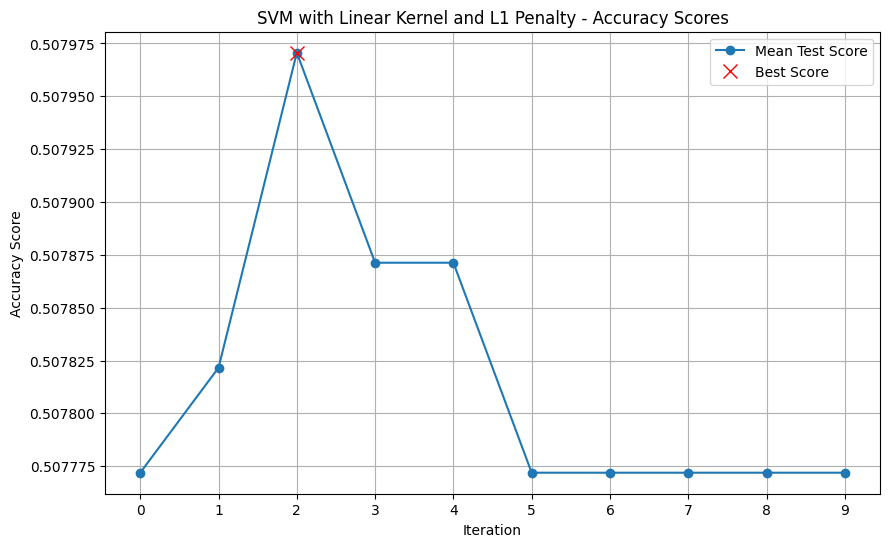

In [25]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(convabuse_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
convabuse_linear_best_score_index = np.argmax(convabuse_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(convabuse_linear_best_score_index, convabuse_svm_linear_grid_search.cv_results_['mean_test_score'][convabuse_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(convabuse_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [26]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(convabuse_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(convabuse_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 1.0, 'loss': 'squared_hinge', 'max_iter': 12, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.5079705871154931


In [27]:
# Train the SVM model with the best parameters
convabuse_svm_model_linear = svm.LinearSVC(**convabuse_svm_linear_grid_search.best_params_, random_state=42)
convabuse_svm_model_linear.fit(convabuse_X_train, convabuse_y_train)

LinearSVC(max_iter=12, random_state=42)

In [28]:
# Print the classification report for the convabuse_svm_model_linear model
convabuse_y_pred_linear = convabuse_svm_model_linear.predict(convabuse_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(convabuse_y_test, convabuse_y_pred_linear))
print(f"F1 Score: {f1_score(convabuse_y_test, convabuse_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(convabuse_y_test, convabuse_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      2067
           1       0.53      0.54      0.54      1972
           2       0.65      0.58      0.61      2058
           3       0.38      0.54      0.44      2000
           4       0.55      0.39      0.45      1971

    accuracy                           0.52     10068
   macro avg       0.53      0.52      0.52     10068
weighted avg       0.53      0.52      0.52     10068

F1 Score: 0.5216
Accuracy: 0.5194


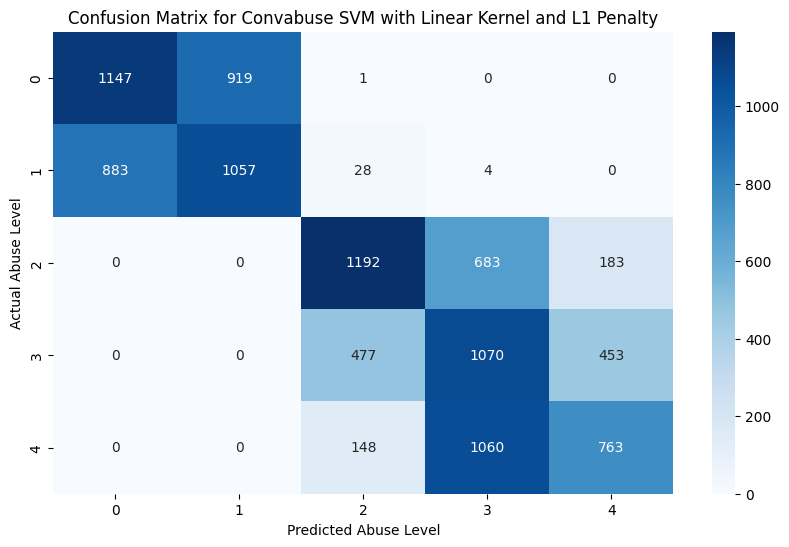

In [29]:
# Plot a heatmap of the actual vs predicted abuse levels for the convabuse_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted Abuse Level')
plt.ylabel('Actual Abuse Level')
plt.show()

In [263]:
svm_classification_results_list.append(("Convabuse", "Linear", "L1", accuracy_score(convabuse_y_test, convabuse_y_pred_linear), f1_score(convabuse_y_test, convabuse_y_pred_linear, average='weighted')))

In [31]:
convabuse_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [32]:
# Use grid search to find the best hyperparameters for the SVM model
convabuse_svm_rbf_param_grid = {
    'kernel__gamma': [0.1], # Kernel coefficient,
    'kernel__n_components': range(2, convabuse_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': range(330, 350), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [33]:
# Perform a grid search using the RBFSampler
convabuse_svm_rbf_grid_search = GridSearchCV(
    estimator=convabuse_svm_rbf_pipeline,
    param_grid=
    convabuse_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [34]:
# Fit the grid search to the training data
convabuse_svm_rbf_grid_search.fit(convabuse_X_train, convabuse_y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': range(330, 350), 'clf__tol': [0.0001],
                         'kernel__gamma': [0.1],
                         'kernel__n_components': range(2, 15)},
             scoring='accuracy', verbose=True)

In [35]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(convabuse_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(convabuse_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 346,
 'clf__tol': 0.0001,
 'kernel__gamma': 0.1,
 'kernel__n_components': 14}
Best score for SVM with RBF kernel:
0.5202626929923821


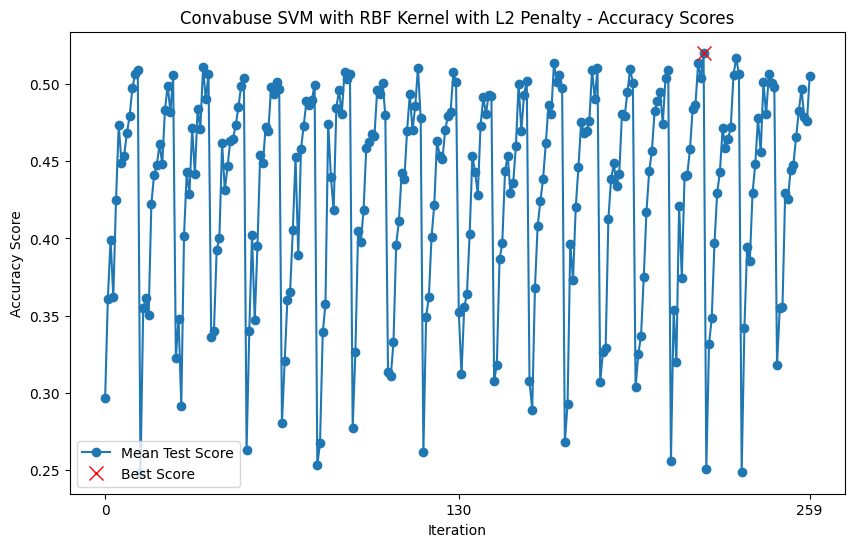

In [36]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_convabuse_svm_rbf_score_index = np.argmax(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_convabuse_svm_rbf_score_index, convabuse_svm_rbf_grid_search.cv_results_['mean_test_score'][best_convabuse_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Convabuse SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(convabuse_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [37]:
# Train the SVM model with the best parameters
convabuse_svm_model_rbf = convabuse_svm_rbf_grid_search.best_estimator_
convabuse_svm_model_rbf.fit(convabuse_X_train, convabuse_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=0.1, n_components=14)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=346,
                               random_state=42, tol=0.0001))])

In [38]:
# Print the classification report for the convabuse_svm_model_rbf model
convabuse_y_pred_rbf = convabuse_svm_model_rbf.predict(convabuse_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(convabuse_y_test, convabuse_y_pred_rbf))
print(f"F1 Score: {f1_score(convabuse_y_test, convabuse_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(convabuse_y_test, convabuse_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      2067
           1       0.57      0.60      0.59      1972
           2       0.46      0.67      0.54      2058
           3       0.24      0.01      0.03      2000
           4       0.45      0.65      0.53      1971

    accuracy                           0.51     10068
   macro avg       0.47      0.51      0.46     10068
weighted avg       0.47      0.51      0.46     10068

F1 Score: 0.4608
Accuracy: 0.5080


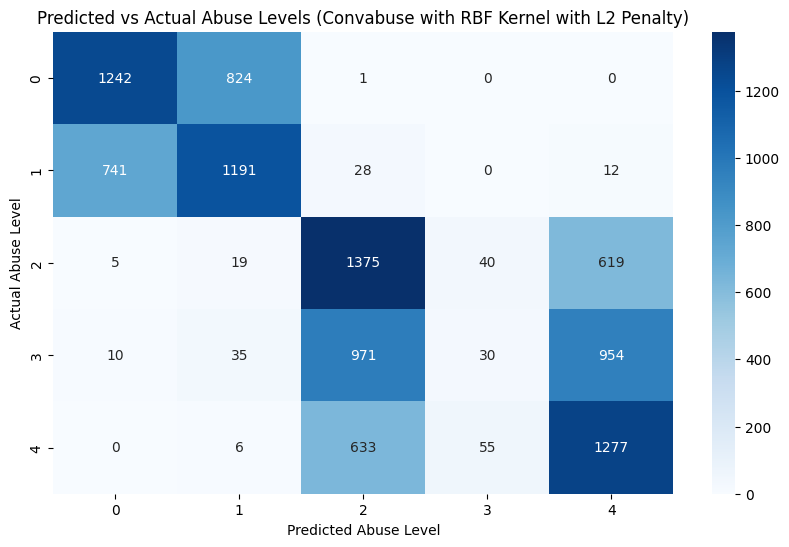

In [39]:
# Plot a heatmap of the predicted vs actual abuse levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual Abuse Levels (Convabuse with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted Abuse Level')
plt.ylabel('Actual Abuse Level')
plt.show()

In [264]:
svm_classification_results_list.append(("Convabuse", "RBF", "L2", accuracy_score(convabuse_y_test, convabuse_y_pred_rbf), f1_score(convabuse_y_test, convabuse_y_pred_rbf, average='weighted')))

In [41]:
# Loop through the parameter grid and train the SVM model
def svm_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the classification report."""
    # Create the SVM model
    svm_model = svm.SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the classification report
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [42]:
convabuse_custom_param_grid = {
    "C": [1.0],
    "kernel": ["linear"],
    "max_iter": range(2960, 3000),
    "class_weight": ["balanced"]
}

In [43]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
convabuse_custom_svm_grid_search, convabuse_custom_svm_model = svm_grid_search(convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test, convabuse_custom_param_grid, "convabuse_custom_svm_model")

Fitting 2 folds for each of 40 candidates, totalling 80 fits
Parameters tested for convabuse_custom_svm_model:
[{'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2960},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2961},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2962},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2963},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2964},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2965},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2966},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2967},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2968},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2969},
 {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2970},
 {'C': 1.0, 'class_w

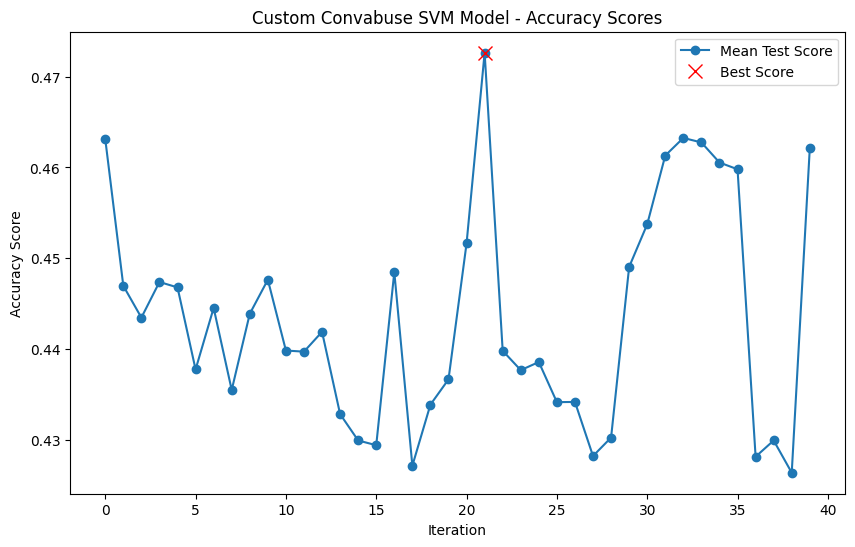

In [44]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(convabuse_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_convabuse_custom_svm_score_index = np.argmax(convabuse_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_convabuse_custom_svm_score_index, convabuse_custom_svm_grid_search.cv_results_['mean_test_score'][best_convabuse_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Convabuse SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [45]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(convabuse_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(convabuse_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 1.0, 'loss': 'squared_hinge', 'max_iter': 12, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.5079705871154931


In [46]:
# Train the SVM model with the best parameters
convabuse_custom_svm_best_model = svm.LinearSVC(**convabuse_svm_linear_grid_search.best_params_, random_state=42)
convabuse_custom_svm_best_model.fit(convabuse_X_train, convabuse_y_train)

LinearSVC(max_iter=12, random_state=42)

In [47]:
# Use the model to make predictions on the test set
convabuse_custom_y_pred = convabuse_custom_svm_model.predict(convabuse_X_test)

# Print the classification report
print("Classification report for Convabuse dataset with L1 regularization:")
print(classification_report(convabuse_y_test, convabuse_custom_y_pred))

Classification report for Convabuse dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2067
           1       0.48      0.98      0.65      1972
           2       0.41      0.37      0.39      2058
           3       0.24      0.10      0.14      2000
           4       0.39      0.68      0.50      1971

    accuracy                           0.42     10068
   macro avg       0.31      0.43      0.34     10068
weighted avg       0.30      0.42      0.33     10068



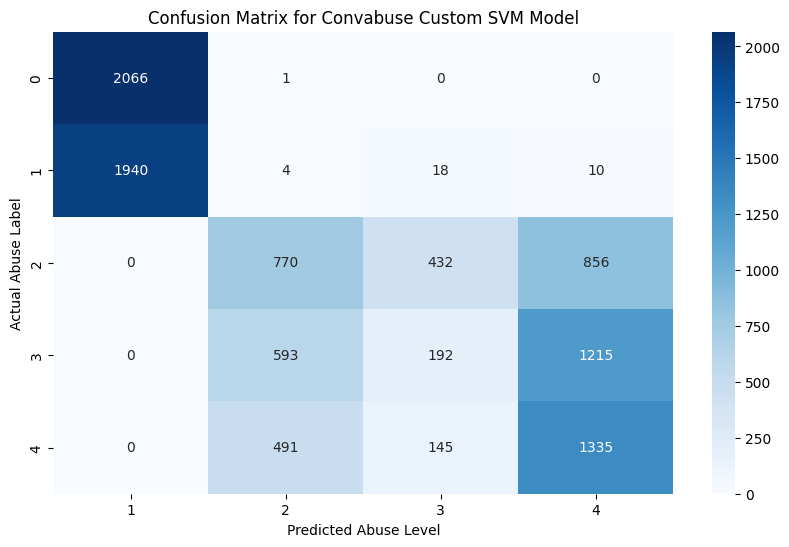

In [48]:
# Plot a heatmap of the predicted vs actual abuse levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_custom_y_pred, rownames=['Actual Abuse Label'], colnames=['Predicted Abuse Level']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse Custom SVM Model')
plt.show()

In [49]:
# Get the custom model's accuracy and f1-score
convabuse_custom_accuracy = accuracy_score(convabuse_y_test, convabuse_custom_y_pred)
convabuse_custom_f1_score = f1_score(convabuse_y_test, convabuse_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {convabuse_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {convabuse_custom_f1_score}")

Custom SVM Model Accuracy: 0.4208382995629718
Custom SVM Model F1-Score: 0.33189370817472796


In [265]:
svm_classification_results_list.append(("Convabuse", "Linear", "L1", convabuse_custom_accuracy, convabuse_custom_f1_score))

In [266]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.5193682955899881, 0.5215577272867292),
 ('Convabuse', 'RBF', 'L2', 0.5080452920143027, 0.46076374809922177),
 ('Convabuse', 'Linear', 'L1', 0.4208382995629718, 0.33189370817472796)]

## Dynamicaly Generated Hate Speech Support Vector Machines

In [52]:
# Use grid search to find the best hyperparameters for the Linear SVC model
dghs_svm_linear_param_grid = {
    'C': [0.1], # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': range(7, 10), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [53]:
dghs_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), dghs_svm_linear_param_grid, cv=5, scoring='accuracy')
dghs_svm_linear_grid_search.fit(dghs_X_train, dghs_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1], 'loss': ['squared_hinge'],
                         'max_iter': range(7, 10), 'tol': [0.0001]},
             scoring='accuracy')

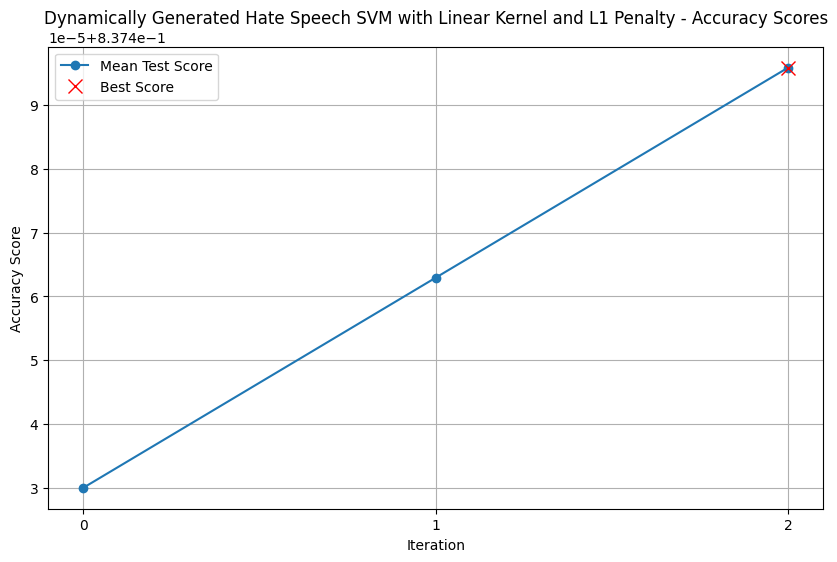

In [54]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(dghs_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
dghs_linear_best_score_index = np.argmax(dghs_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(dghs_linear_best_score_index, dghs_svm_linear_grid_search.cv_results_['mean_test_score'][dghs_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Dynamically Generated Hate Speech SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(dghs_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [55]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty (from pickled model):")
pprint(dghs_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty (from pickled model):")
print(dghs_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty (from pickled model):
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 9, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty (from pickled model):
0.837495881383855


In [56]:
# Train the SVM model with the best parameters
dghs_svm_model_linear = svm.LinearSVC(**dghs_svm_linear_grid_search.best_params_, random_state=42)
dghs_svm_model_linear.fit(dghs_X_train, dghs_y_train)

LinearSVC(C=0.1, max_iter=9, random_state=42)

In [57]:
# Print the classification report for the dghs_svm_model_linear model
dghs_y_pred_linear = dghs_svm_model_linear.predict(dghs_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(dghs_y_test, dghs_y_pred_linear))
print(f"F1 Score: {f1_score(dghs_y_test, dghs_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(dghs_y_test, dghs_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.67      0.81      3800

    accuracy                           0.84      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.84      0.83      7588

F1 Score: 0.8324
Accuracy: 0.8368


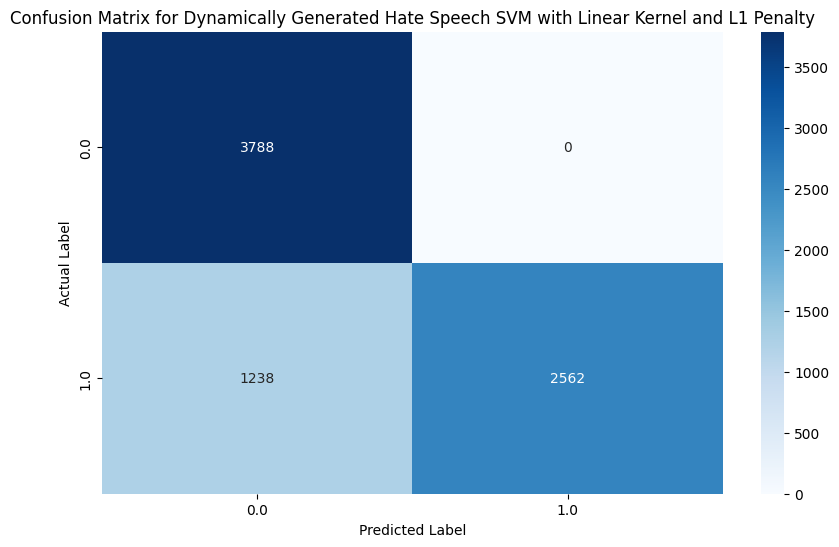

In [58]:
# Plot a heatmap of the actual vs predicted label for the us_accidents_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Dynamically Generated Hate Speech SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [267]:
svm_classification_results_list.append(("Dynamically Generated Hate Speech", "Linear", "L1", accuracy_score(dghs_y_test, dghs_y_pred_linear), f1_score(dghs_y_test, dghs_y_pred_linear, average='weighted')))

In [60]:
dghs_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [61]:
# Use grid search to find the best hyperparameters for the SVM model
dghs_svm_rbf_param_grid = {
    'kernel__gamma': [0.1, 0.2, 0.3], # Kernel coefficient,
    'kernel__n_components': range(2, dghs_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': range(330, 350), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [62]:
# Perform a grid search using the RBFSampler
dghs_svm_rbf_grid_search = GridSearchCV(
    estimator=dghs_svm_rbf_pipeline,
    param_grid=
    dghs_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [63]:
# Fit the grid search to the training data
dghs_svm_rbf_grid_search.fit(dghs_X_train, dghs_y_train)

Fitting 5 folds for each of 660 candidates, totalling 3300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': range(330, 350), 'clf__tol': [0.0001],
                         'kernel__gamma': [0.1, 0.2, 0.3],
                         'kernel__n_components': range(2, 13)},
             scoring='accuracy', verbose=True)

In [64]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with RBF kernel (from pickled model):")
pprint(dghs_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel (from pickled model):")
print(dghs_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel (from pickled model):
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 338,
 'clf__tol': 0.0001,
 'kernel__gamma': 0.1,
 'kernel__n_components': 12}
Best score for SVM with RBF kernel (from pickled model):
0.839835255354201


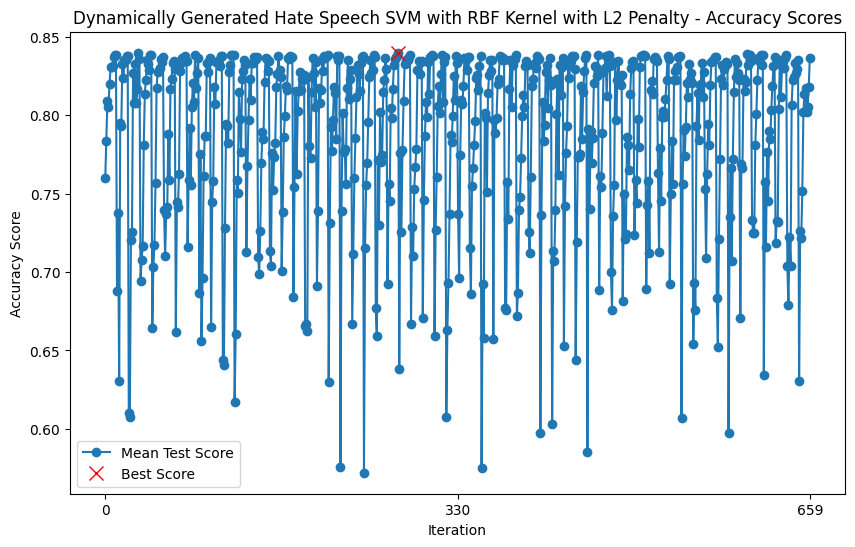

In [65]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(dghs_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_dghs_svm_rbf_score_index = np.argmax(dghs_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_dghs_svm_rbf_score_index, dghs_svm_rbf_grid_search.cv_results_['mean_test_score'][best_dghs_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Dynamically Generated Hate Speech SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(dghs_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(dghs_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [66]:
# Train the SVM model with the best parameters
dghs_svm_model_rbf = dghs_svm_rbf_grid_search.best_estimator_
dghs_svm_model_rbf.fit(dghs_X_train, dghs_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=0.1, n_components=12)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=338,
                               random_state=42, tol=0.0001))])

In [67]:
# Print the classification report for the dghs_svm_model_rbf model
dghs_y_pred_rbf = dghs_svm_model_rbf.predict(dghs_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(dghs_y_test, dghs_y_pred_rbf))
print(f"F1 Score: {f1_score(dghs_y_test, dghs_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(dghs_y_test, dghs_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.68      0.81      3800

    accuracy                           0.84      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.84      0.83      7588

F1 Score: 0.8334
Accuracy: 0.8378


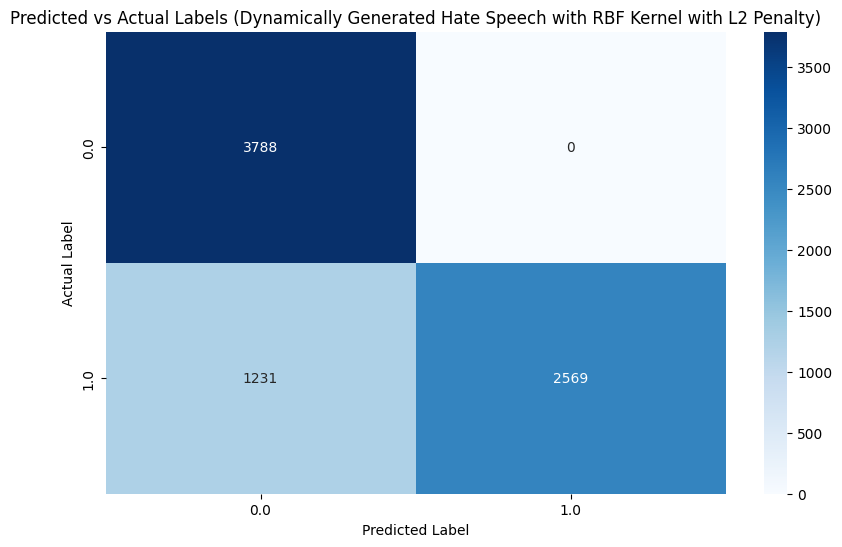

In [68]:
# Plot a heatmap of the predicted vs actual labels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual Labels (Dynamically Generated Hate Speech with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [268]:
svm_classification_results_list.append(("Dynamically Generated Hate Speech", "RBF", "L2", accuracy_score(dghs_y_test, dghs_y_pred_rbf), f1_score(dghs_y_test, dghs_y_pred_rbf, average='weighted')))

In [70]:
# Loop through the parameter grid and train the SVM model
def svm_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the classification report."""
    # Create the SVM model
    svm_model = svm.SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the classification report
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [71]:
dghs_custom_param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf"],
    "max_iter": [1000, 2000, 3000],
    "class_weight": ["balanced", None]
}

In [72]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
dghs_custom_svm_grid_search, dghs_custom_svm_model = svm_grid_search(dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test, dghs_custom_param_grid, "dghs_custom_svm_model")

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Parameters tested for dghs_custom_svm_model:
[{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 1000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 2000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 3000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'poly', 'max_iter': 1000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'poly', 'max_iter': 2000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'poly', 'max_iter': 3000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf', 'max_iter': 1000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf', 'max_iter': 2000},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf', 'max_iter': 3000},
 {'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 1000},
 {'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 2000},
 {'C': 0.1, 'class_weight': None, 'kernel': 'linear

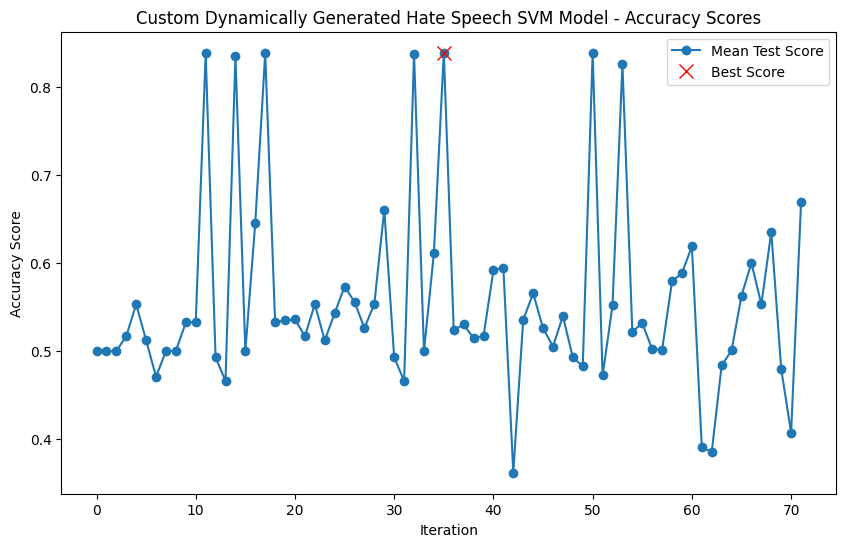

In [73]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(dghs_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_dghs_custom_svm_score_index = np.argmax(dghs_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_dghs_custom_svm_score_index, dghs_custom_svm_grid_search.cv_results_['mean_test_score'][best_dghs_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Dynamically Generated Hate Speech SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [74]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty (from pickled model):")
pprint(dghs_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty (from pickled model):")
print(dghs_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty (from pickled model):
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 9, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty (from pickled model):
0.837495881383855


In [75]:
# Train the SVM model with the best parameters
dghs_custom_svm_best_model = svm.LinearSVC(**dghs_svm_linear_grid_search.best_params_, random_state=42)
dghs_custom_svm_best_model.fit(dghs_X_train, dghs_y_train)

LinearSVC(C=0.1, max_iter=9, random_state=42)

In [76]:
# Use the model to make predictions on the test set
dghs_custom_y_pred = dghs_custom_svm_model.predict(dghs_X_test)

# Print the classification report
print("Classification report for US Accidents Upsampled dataset with L1 regularization:")
print(classification_report(dghs_y_test, dghs_custom_y_pred))

Classification report for US Accidents Upsampled dataset with L1 regularization:
              precision    recall  f1-score   support

         0.0       0.93      0.40      0.56      3788
         1.0       0.62      0.97      0.75      3800

    accuracy                           0.68      7588
   macro avg       0.77      0.68      0.66      7588
weighted avg       0.77      0.68      0.66      7588



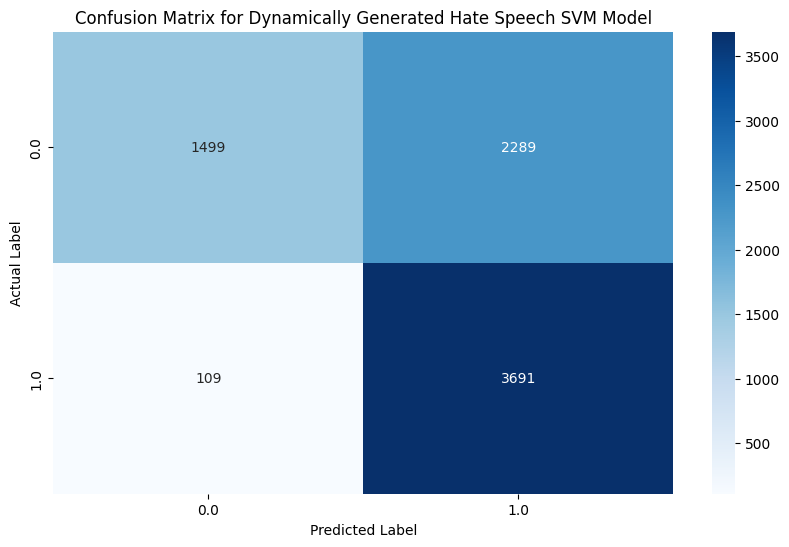

In [77]:
# Plot a heatmap of the predicted vs actual labels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_custom_y_pred, rownames=['Actual Label'], colnames=['Predicted Label']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Dynamically Generated Hate Speech SVM Model')
plt.show()

In [78]:
# Get the custom model's accuracy and f1-score
dghs_custom_accuracy = accuracy_score(dghs_y_test, dghs_custom_y_pred)
dghs_custom_f1_score = f1_score(dghs_y_test, dghs_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {dghs_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {dghs_custom_f1_score}")

Custom SVM Model Accuracy: 0.683974696889826
Custom SVM Model F1-Score: 0.655358751115592


In [269]:
svm_classification_results_list.append(("Dynamically Generated Hate Speech", "Linear", "L1", dghs_custom_accuracy, dghs_custom_f1_score))

In [270]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.5193682955899881, 0.5215577272867292),
 ('Convabuse', 'RBF', 'L2', 0.5080452920143027, 0.46076374809922177),
 ('Convabuse', 'Linear', 'L1', 0.4208382995629718, 0.33189370817472796),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.8368476541908276,
  0.8324315661162446),
 ('Dynamically Generated Hate Speech',
  'RBF',
  'L2',
  0.8377701634159199,
  0.8334301282943788),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.683974696889826,
  0.655358751115592)]

## Online Abusive Attacks Support Vector Machines

In [81]:
# Use grid search to find the best hyperparameters for the Linear SVC model
oaa_svm_linear_param_grid = {
    'C': [0.1, 1, 10, 100, 1000], # Regularization parameter
    'loss': ['squared_epsilon_insensitive', 'epsilon_insensitive'], # Loss function
    'max_iter': range(100, 1000, 100), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [82]:
oaa_svm_linear_grid_search = GridSearchCV(svm.LinearSVR(), oaa_svm_linear_param_grid, cv=5, scoring='r2')
oaa_svm_linear_grid_search.fit(oaa_X_train, oaa_y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'loss': ['squared_epsilon_insensitive',
                                  'epsilon_insensitive'],
                         'max_iter': range(100, 1000, 100), 'tol': [0.0001]},
             scoring='r2')

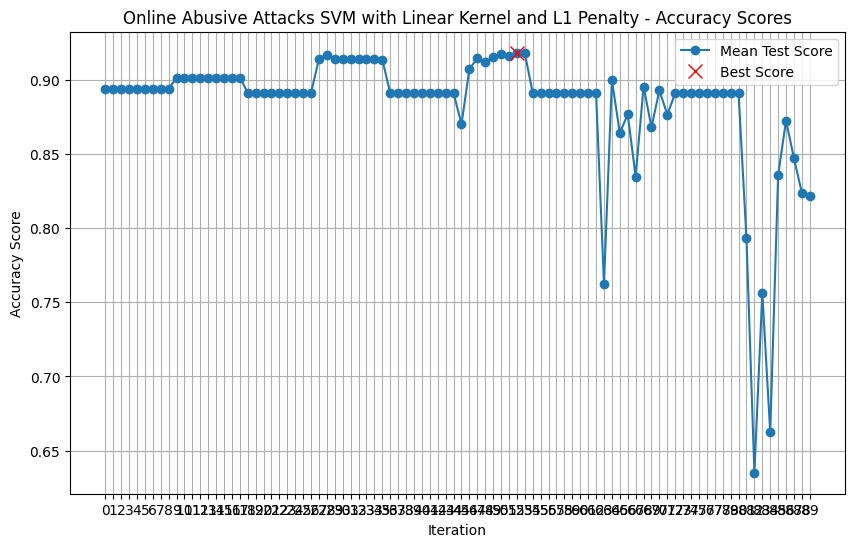

In [83]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(oaa_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
oaa_linear_best_score_index = np.argmax(oaa_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(oaa_linear_best_score_index, oaa_svm_linear_grid_search.cv_results_['mean_test_score'][oaa_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Online Abusive Attacks SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(oaa_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [84]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(oaa_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(oaa_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 10, 'loss': 'epsilon_insensitive', 'max_iter': 800, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.9182103786015794


In [85]:
# Train the SVM model with the best parameters
oaa_svm_model_linear = svm.LinearSVR(**oaa_svm_linear_grid_search.best_params_, random_state=42)
oaa_svm_model_linear.fit(oaa_X_train, oaa_y_train)

LinearSVR(C=10, max_iter=800, random_state=42)

In [86]:
# Print the RMSE and R2 for the oaa_svm_model_linear model
oaa_y_pred_linear = oaa_svm_model_linear.predict(oaa_X_test)
print("RMSE for SVM with linear kernel and L1 penalty:")
print(root_mean_squared_error(oaa_y_test, oaa_y_pred_linear))
print("R2 for SVM with linear kernel and L1 penalty:")
print(r2_score(oaa_y_test, oaa_y_pred_linear))

RMSE for SVM with linear kernel and L1 penalty:
4.8892975239126875
R2 for SVM with linear kernel and L1 penalty:
0.8994953948616791


In [271]:
svm_regression_results_list.append(("Online Abusive Attacks", "Linear", "L1", root_mean_squared_error(oaa_y_test, oaa_y_pred_linear), r2_score(oaa_y_test, oaa_y_pred_linear)))

In [88]:
# Loop through the parameter grid and train the SVM model
def svm_reg_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the regression scores."""
    # Create the SVM model
    svm_model = svm.SVR()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='r2', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the RMSE and R2 score
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [89]:
oaa_custom_param_grid = {
    "C": [1],
    "kernel": ["linear", "poly", "rbf"],
    "max_iter": range(1200, 1230)
}

In [90]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
oaa_custom_svm_grid_search, oaa_custom_svm_model = svm_reg_grid_search(oaa_X_train, oaa_X_test, oaa_y_train, oaa_y_test, oaa_custom_param_grid, "oaa_custom_svm_model")

Fitting 2 folds for each of 90 candidates, totalling 180 fits
Parameters tested for oaa_custom_svm_model:
[{'C': 1, 'kernel': 'linear', 'max_iter': 1200},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1201},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1202},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1203},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1204},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1205},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1206},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1207},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1208},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1209},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1210},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1211},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1212},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1213},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1214},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1215},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1216},
 {'C': 1, 'kernel': 'linear', 'max_iter': 1217},
 {'C': 1, 'k

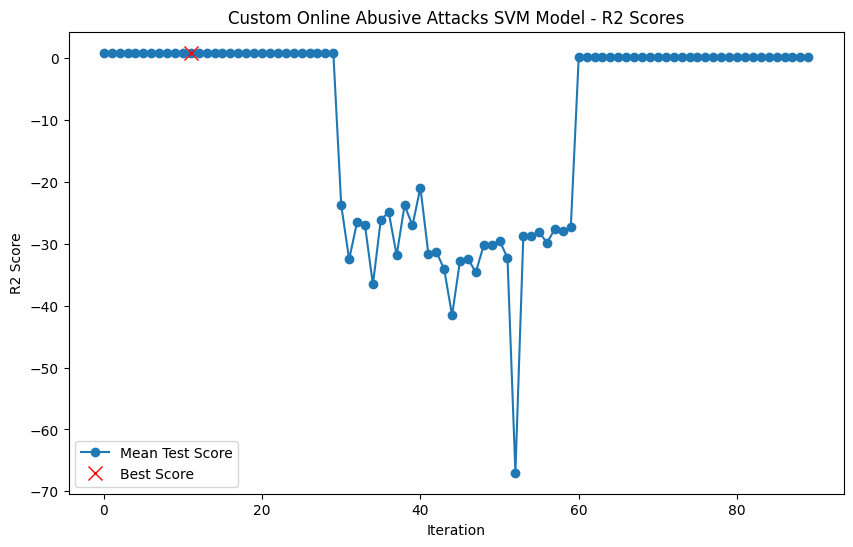

In [91]:
# Plot all R2 scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(oaa_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum R2 score
best_oaa_custom_svm_score_index = np.argmax(oaa_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_oaa_custom_svm_score_index, oaa_custom_svm_grid_search.cv_results_['mean_test_score'][best_oaa_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Online Abusive Attacks SVM Model - R2 Scores')
plt.xlabel('Iteration')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [92]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(oaa_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(oaa_custom_svm_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 1, 'kernel': 'linear', 'max_iter': 1211}
Best score for SVM with linear kernel and L1 penalty:
0.8961364053599424


In [93]:
# Train the SVM model with the best parameters
oaa_custom_svm_best_params = oaa_custom_svm_grid_search.best_params_.copy()
oaa_custom_svm_best_params.pop('kernel', None) # Remove the kernel key if it exists
oaa_custom_svm_best_model = svm.LinearSVR(**oaa_custom_svm_best_params, random_state=42)
oaa_custom_svm_best_model.fit(oaa_X_train, oaa_y_train)

LinearSVR(C=1, max_iter=1211, random_state=42)

In [94]:
# Use the model to make predictions on the test set
oaa_custom_y_pred = oaa_custom_svm_model.predict(oaa_X_test)

# Print the RMSE and R2 scores:
print("RMSE for SVM with linear kernel and L1 penalty:")
print(root_mean_squared_error(oaa_y_test, oaa_custom_y_pred))
print("R2 for SVM with linear kernel and L1 penalty:")
print(r2_score(oaa_y_test, oaa_custom_y_pred))

RMSE for SVM with linear kernel and L1 penalty:
4.823755114657571
R2 for SVM with linear kernel and L1 penalty:
0.9021719190581577


In [272]:
svm_regression_results_list.append(("Online Abusive Attacks", "Linear", "L1", root_mean_squared_error(oaa_y_test, oaa_custom_y_pred), r2_score(oaa_y_test, oaa_custom_y_pred)))

In [273]:
svm_regression_results_list

[('Online Abusive Attacks',
  'Linear',
  'L1',
  4.8892975239126875,
  0.8994953948616791),
 ('Online Abusive Attacks',
  'Linear',
  'L1',
  4.823755114657571,
  0.9021719190581577)]

## US Elections 2020 Hate Speech Support Vector Machines

In [97]:
# Use grid search to find the best hyperparameters for the Linear SVC model
us2020hs_svm_linear_param_grid = {
    'C': [0.1], # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': range(2, 10), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [98]:
us2020hs_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), us2020hs_svm_linear_param_grid, cv=5, scoring='accuracy')
us2020hs_svm_linear_grid_search.fit(us2020hs_X_train, us2020hs_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1], 'loss': ['squared_hinge'],
                         'max_iter': range(2, 10), 'tol': [0.0001]},
             scoring='accuracy')

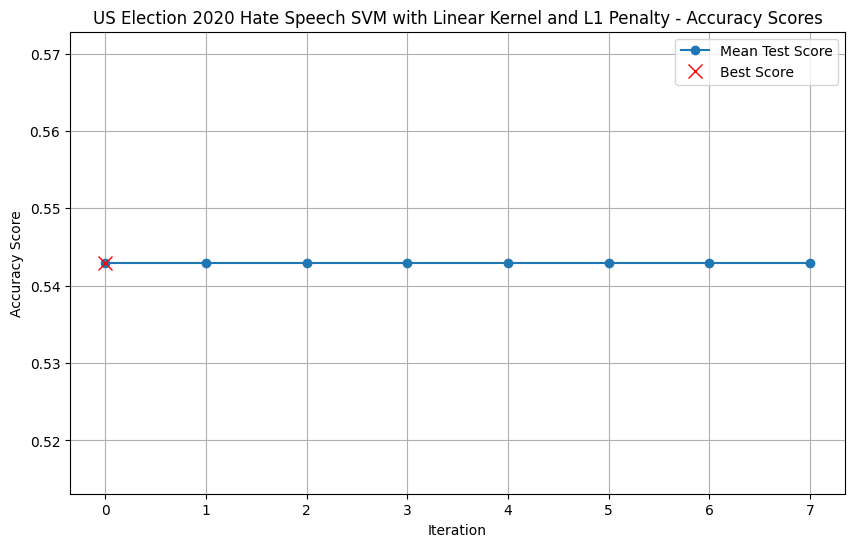

In [99]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
us2020hs_linear_best_score_index = np.argmax(us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(us2020hs_linear_best_score_index, us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'][us2020hs_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('US Election 2020 Hate Speech SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(us2020hs_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [100]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(us2020hs_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(us2020hs_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 2, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.5429713082800561


In [101]:
# Train the SVM model with the best parameters
us2020hs_svm_model_linear = svm.LinearSVC(**us2020hs_svm_linear_grid_search.best_params_, random_state=42)
us2020hs_svm_model_linear.fit(us2020hs_X_train, us2020hs_y_train)

LinearSVC(C=0.1, max_iter=2, random_state=42)

In [102]:
# Print the classification report for the us2020hs_svm_model_linear model
us2020hs_y_pred_linear = us2020hs_svm_model_linear.predict(us2020hs_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(us2020hs_y_test, us2020hs_y_pred_linear))
print(f"F1 Score: {f1_score(us2020hs_y_test, us2020hs_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(us2020hs_y_test, us2020hs_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       515
           1       0.54      0.48      0.51       545

    accuracy                           0.52      1060
   macro avg       0.52      0.52      0.52      1060
weighted avg       0.52      0.52      0.52      1060

F1 Score: 0.5202
Accuracy: 0.5208


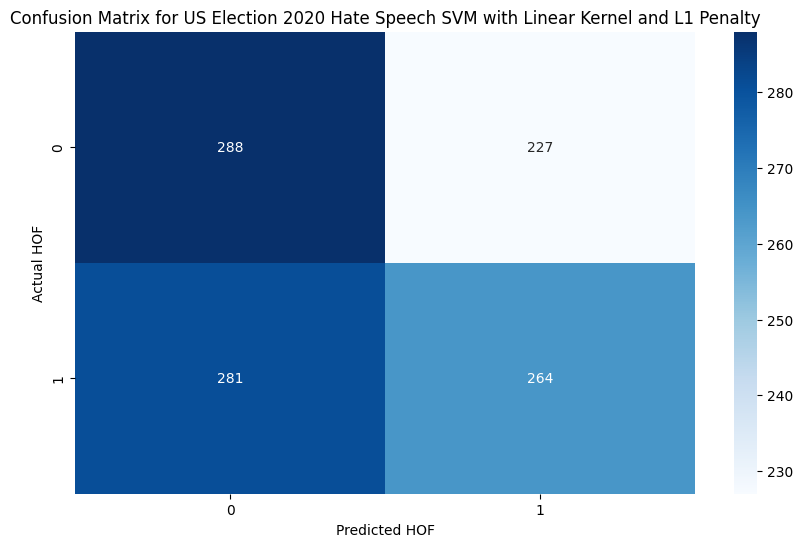

In [103]:
# Plot a heatmap of the actual vs predicted HOF for the us_accidents_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for US Election 2020 Hate Speech SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [274]:
svm_classification_results_list.append(("US Elections 2020 Election Hate Speech", "Linear", "L1", accuracy_score(us2020hs_y_test, us2020hs_y_pred_linear), f1_score(us2020hs_y_test, us2020hs_y_pred_linear, average='weighted')))

In [105]:
us2020hs_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [106]:
# Use grid search to find the best hyperparameters for the SVM model
us2020hs_svm_rbf_param_grid = {
    'kernel__gamma': [0.1, 0.2, 0.3], # Kernel coefficient,
    'kernel__n_components': range(2, us2020hs_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': range(820, 840), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [107]:
# Perform a grid search using the RBFSampler
us2020hs_svm_rbf_grid_search = GridSearchCV(
    estimator=us2020hs_svm_rbf_pipeline,
    param_grid=
    us2020hs_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [108]:
# Fit the grid search to the training data
us2020hs_svm_rbf_grid_search.fit(us2020hs_X_train, us2020hs_y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': range(820, 840), 'clf__tol': [0.0001],
                         'kernel__gamma': [0.1, 0.2, 0.3],
                         'kernel__n_components': range(2, 4)},
             scoring='accuracy', verbose=True)

In [109]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(us2020hs_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(us2020hs_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 826,
 'clf__tol': 0.0001,
 'kernel__gamma': 0.2,
 'kernel__n_components': 2}
Best score for SVM with RBF kernel:
0.5521747120803725


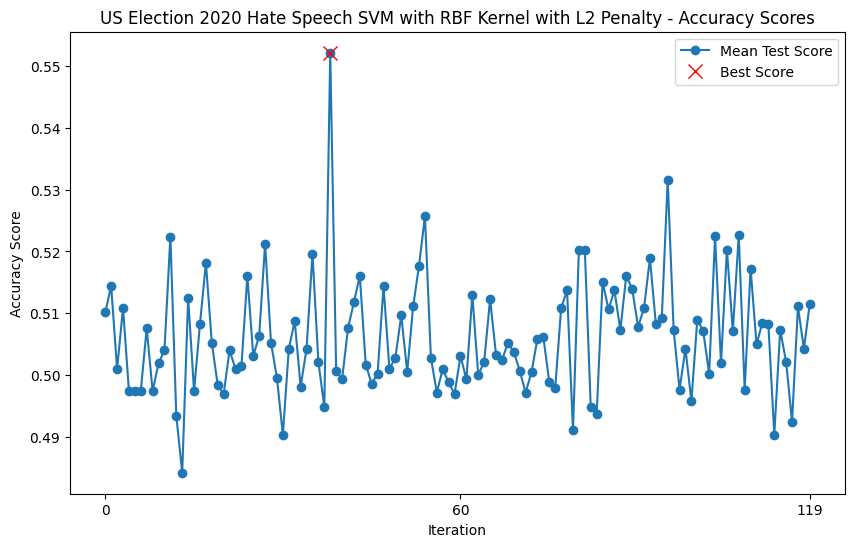

In [110]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_us2020hs_svm_rbf_score_index = np.argmax(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_us2020hs_svm_rbf_score_index, us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score'][best_us2020hs_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('US Election 2020 Hate Speech SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(us2020hs_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [111]:
# Train the SVM model with the best parameters
us2020hs_svm_model_rbf = us2020hs_svm_rbf_grid_search.best_estimator_
us2020hs_svm_model_rbf.fit(us2020hs_X_train, us2020hs_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=0.2, n_components=2)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=826,
                               random_state=42, tol=0.0001))])

In [112]:
# Print the classification report for the us2020hs_svm_model_rbf model
us2020hs_y_pred_rbf = us2020hs_svm_model_rbf.predict(us2020hs_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(us2020hs_y_test, us2020hs_y_pred_rbf))
print(f"F1 Score: {f1_score(us2020hs_y_test, us2020hs_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(us2020hs_y_test, us2020hs_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       515
           1       0.51      1.00      0.68       545

    accuracy                           0.51      1060
   macro avg       0.26      0.50      0.34      1060
weighted avg       0.26      0.51      0.35      1060

F1 Score: 0.3492
Accuracy: 0.5142


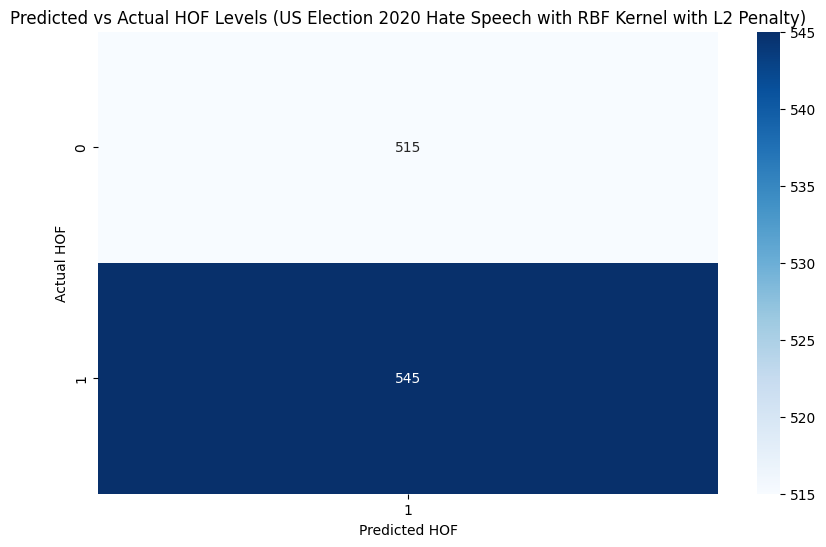

In [113]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual HOF Levels (US Election 2020 Hate Speech with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [275]:
svm_classification_results_list.append(("US Elections 2020 Election Hate Speech", "RBF", "L2", accuracy_score(us2020hs_y_test, us2020hs_y_pred_rbf), f1_score(us2020hs_y_test, us2020hs_y_pred_rbf, average='weighted')))

In [115]:
us2020hs_custom_param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf"],
    "max_iter": range(160, 200),
    "class_weight": ["balanced", None]
}

In [116]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
us2020hs_custom_svm_grid_search, us2020hs_custom_svm_model = svm_grid_search(us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test, us2020hs_custom_param_grid, "us2020hs_custom_svm_model")

Fitting 2 folds for each of 960 candidates, totalling 1920 fits
Parameters tested for us2020hs_custom_svm_model:
[{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 160},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 161},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 162},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 163},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 164},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 165},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 166},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 167},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 168},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 169},
 {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear', 'max_iter': 170},
 {'C': 0.1, 'class_weight': '

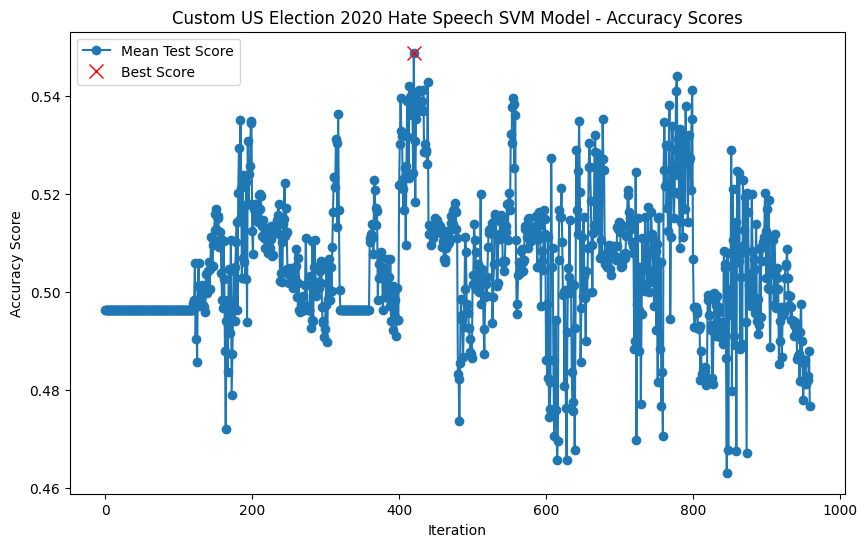

In [117]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_us2020hs_custom_svm_score_index = np.argmax(us2020hs_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_us2020hs_custom_svm_score_index, us2020hs_custom_svm_grid_search.cv_results_['mean_test_score'][best_us2020hs_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom US Election 2020 Hate Speech SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [118]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(us2020hs_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(us2020hs_custom_svm_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 1, 'class_weight': None, 'kernel': 'poly', 'max_iter': 180}
Best score for SVM with linear kernel and L1 penalty:
0.5488668555240793


In [119]:
# Train the SVM model with the best parameters
us2020hs_custom_svm_best_params = us2020hs_custom_svm_grid_search.best_params_.copy()
us2020hs_custom_svm_best_params.pop('kernel', None) # Remove the kernel key if it exists
us2020hs_custom_svm_best_model = svm.LinearSVC(**us2020hs_custom_svm_best_params, random_state=42)
us2020hs_custom_svm_best_model.fit(us2020hs_X_train, us2020hs_y_train)

LinearSVC(C=1, max_iter=180, random_state=42)

In [120]:
# Use the model to make predictions on the test set
us2020hs_custom_y_pred = us2020hs_custom_svm_best_model.predict(us2020hs_X_test)

# Print the classification report
print("Classification report for US Accidents Upsampled dataset with L1 regularization:")
print(classification_report(us2020hs_y_test, us2020hs_custom_y_pred))

Classification report for US Accidents Upsampled dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       515
           1       0.54      0.48      0.51       545

    accuracy                           0.52      1060
   macro avg       0.52      0.52      0.52      1060
weighted avg       0.52      0.52      0.52      1060



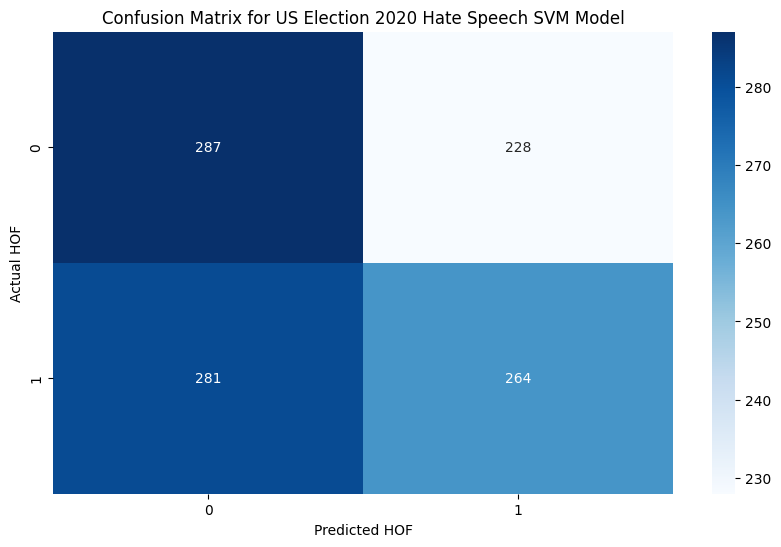

In [121]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_custom_y_pred, rownames=['Actual HOF'], colnames=['Predicted HOF']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for US Election 2020 Hate Speech SVM Model')
plt.show()

In [122]:
# Get the custom model's accuracy and f1-score
us2020hs_custom_accuracy = accuracy_score(us2020hs_y_test, us2020hs_custom_y_pred)
us2020hs_custom_f1_score = f1_score(us2020hs_y_test, us2020hs_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {us2020hs_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {us2020hs_custom_f1_score}")

Custom SVM Model Accuracy: 0.519811320754717
Custom SVM Model F1-Score: 0.5192901159511026


In [276]:
svm_classification_results_list.append(("US Elections 2020 Election Hate Speech", "Linear", "L1", us2020hs_custom_accuracy, us2020hs_custom_f1_score))

In [277]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.5193682955899881, 0.5215577272867292),
 ('Convabuse', 'RBF', 'L2', 0.5080452920143027, 0.46076374809922177),
 ('Convabuse', 'Linear', 'L1', 0.4208382995629718, 0.33189370817472796),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.8368476541908276,
  0.8324315661162446),
 ('Dynamically Generated Hate Speech',
  'RBF',
  'L2',
  0.8377701634159199,
  0.8334301282943788),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.683974696889826,
  0.655358751115592),
 ('US Elections 2020 Election Hate Speech',
  'Linear',
  'L1',
  0.5207547169811321,
  0.5202016549924369),
 ('US Elections 2020 Election Hate Speech',
  'RBF',
  'L2',
  0.5141509433962265,
  0.349174160935755),
 ('US Elections 2020 Election Hate Speech',
  'Linear',
  'L1',
  0.519811320754717,
  0.5192901159511026)]

## MLMA Hate Speech Support Vector Machines

In [254]:
# Use grid search to find the best hyperparameters for the Linear SVC model
mlma_hate_speech_svm_linear_param_grid = {
    'C': [0.1, 1], # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': range(2, 10), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [255]:
# Get a 30% sample of mlma_hate_speech
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

# X and y
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop('target_group', axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample['target_group']

# Standard scale
mlma_hate_speech_X_sample_scaled = StandardScaler().fit_transform(mlma_hate_speech_X_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_sample.columns)

# Train test split
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [256]:
mlma_hate_speech_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), mlma_hate_speech_svm_linear_param_grid, cv=5, scoring='accuracy')
mlma_hate_speech_svm_linear_grid_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1], 'loss': ['squared_hinge'],
                         'max_iter': range(2, 10), 'tol': [0.0001]},
             scoring='accuracy')

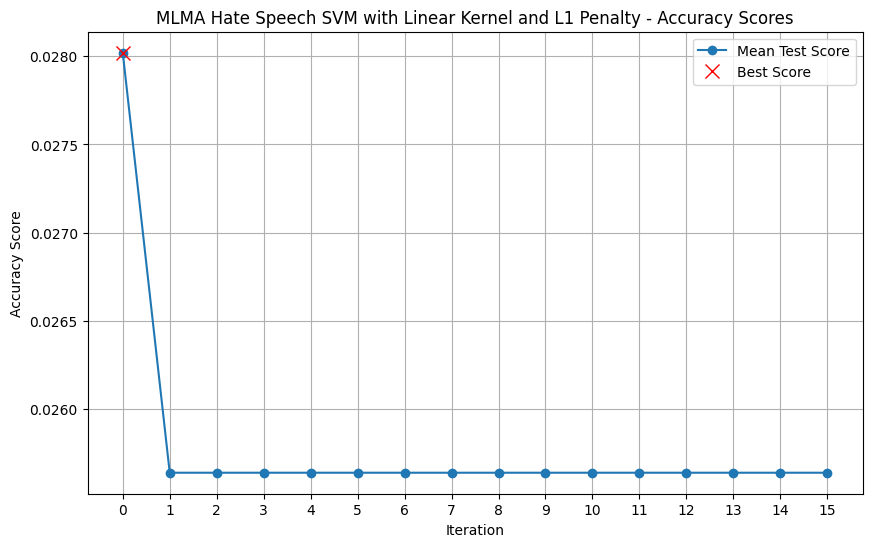

In [257]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
mlma_hate_speech_linear_best_score_index = np.argmax(mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(mlma_hate_speech_linear_best_score_index, mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'][mlma_hate_speech_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('MLMA Hate Speech SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(mlma_hate_speech_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [258]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(mlma_hate_speech_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(mlma_hate_speech_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 2, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.028020145158588194


In [259]:
# Train the SVM model with the best parameters
mlma_hate_speech_svm_model_linear = svm.LinearSVC(**mlma_hate_speech_svm_linear_grid_search.best_params_, random_state=42)
mlma_hate_speech_svm_model_linear.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

LinearSVC(C=0.1, max_iter=2, random_state=42)

In [260]:
len(mlma_hate_speech_X_train), len(mlma_hate_speech_y_train), len(mlma_hate_speech_y_pred_linear)

(174874, 174874, 43719)

In [261]:
# Print the classification report for the mlma_hate_speech_svm_model_linear model
mlma_hate_speech_y_pred_linear = mlma_hate_speech_svm_model_linear.predict(mlma_hate_speech_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear))
print(f"F1 Score: {f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.04      1.00      0.09       585
           1       0.00      0.00      0.00       495
           2       0.00      0.00      0.00       546
           3       0.00      0.00      0.00       570
           4       0.00      0.00      0.00       546
           5       0.00      0.00      0.00       543
           6       0.00      0.00      0.00       530
           7       0.00      0.00      0.00       518
           8       0.00      0.00      0.00       566
           9       0.00      0.00      0.00       533
          10       0.00      0.00      0.00       600
          11       0.00      0.00      0.00       599
          12       0.00      0.00      0.00       545
          13       0.00      0.00      0.00       545
          14       0.00      0.00      0.00       557
          15       0.00      0.00      0.00       559
          16    

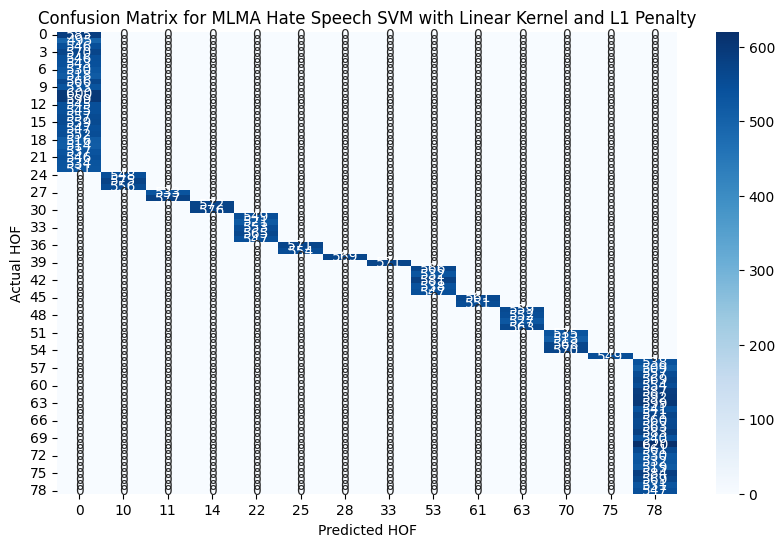

In [262]:
# Plot a heatmap of the actual vs predicted HOF for the mlma_hate_speech_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLMA Hate Speech SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [278]:
svm_classification_results_list.append(("MLMA Hate Speech", "Linear", "L1", accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear), f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_linear, average='weighted')))

In [337]:
mlma_hate_speech_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

In [341]:
# Use grid search to find the best hyperparameters for the SVM model
mlma_hate_speech_svm_rbf_param_grid = {
    'kernel__gamma': [1], # Kernel coefficient,
    'kernel__n_components': [9],  # range(7, mlma_hate_speech_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': range(470, 495, 5), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

In [342]:
# Perform a grid search using the RBFSampler
mlma_hate_speech_svm_rbf_grid_search = GridSearchCV(
    estimator=mlma_hate_speech_svm_rbf_pipeline,
    param_grid=
    mlma_hate_speech_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [343]:
# Fit the grid search to the training data
mlma_hate_speech_svm_rbf_grid_search.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': range(470, 495, 5),
                         'clf__tol': [0.0001], 'kernel__gamma': [1],
                         'kernel__n_components': [9]},
             scoring='accuracy', verbose=True)

In [344]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(mlma_hate_speech_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(mlma_hate_speech_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 485,
 'clf__tol': 0.0001,
 'kernel__gamma': 1,
 'kernel__n_components': 9}
Best score for SVM with RBF kernel:
0.9416434519947485


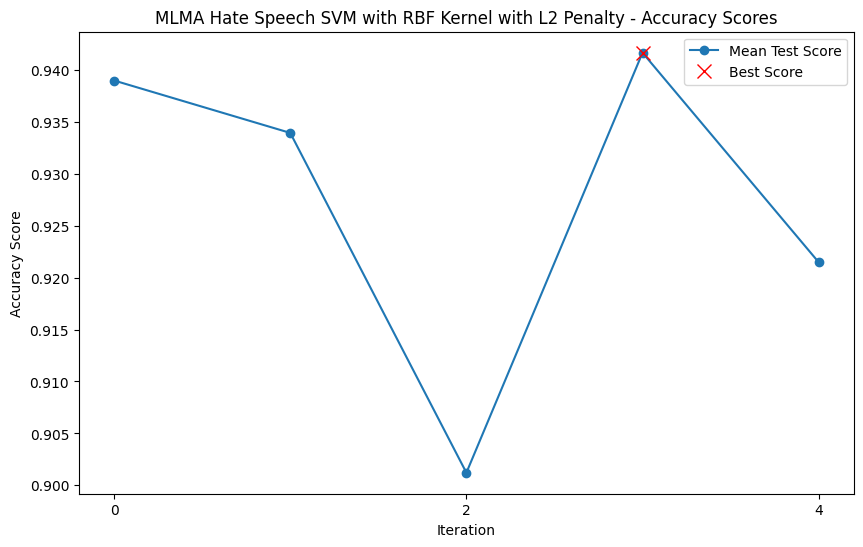

In [345]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_mlma_hate_speech_svm_rbf_score_index = np.argmax(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_mlma_hate_speech_svm_rbf_score_index, mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score'][best_mlma_hate_speech_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('MLMA Hate Speech SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(mlma_hate_speech_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [346]:
# Train the SVM model with the best parameters
mlma_hate_speech_svm_model_rbf = mlma_hate_speech_svm_rbf_grid_search.best_estimator_
mlma_hate_speech_svm_model_rbf.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=1, n_components=9)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=485,
                               random_state=42, tol=0.0001))])

In [347]:
# Print the classification report for the mlma_hate_speech_svm_model_rbf model
mlma_hate_speech_y_pred_rbf = mlma_hate_speech_svm_model_rbf.predict(mlma_hate_speech_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf))
print(f"F1 Score: {f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       585
           1       0.00      0.00      0.00       495
           2       1.00      1.00      1.00       546
           3       1.00      1.00      1.00       570
           4       1.00      1.00      1.00       546
           5       1.00      1.00      1.00       543
           6       0.51      1.00      0.67       530
           7       0.00      0.00      0.00       518
           8       1.00      1.00      1.00       566
           9       1.00      1.00      1.00       533
          10       1.00      1.00      1.00       600
          11       1.00      1.00      1.00       599
          12       1.00      1.00      1.00       545
          13       1.00      1.00      1.00       545
          14       1.00      1.00      1.00       557
          15       0.51      1.00      0.67       559
          16       0.00      0.00 

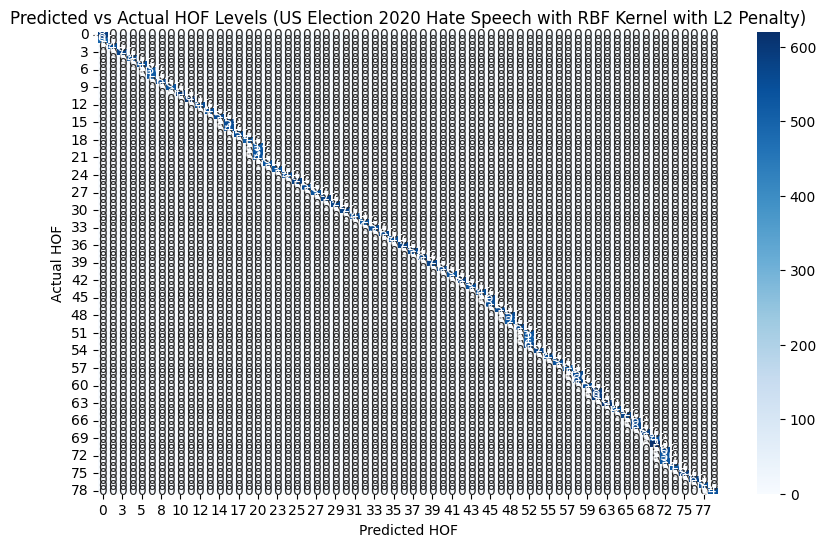

In [348]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual HOF Levels (US Election 2020 Hate Speech with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted HOF')
plt.ylabel('Actual HOF')
plt.show()

In [349]:
svm_classification_results_list.append(("MLMA Hate Speech", "RBF", "L2", accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf), f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred_rbf, average='weighted')))

In [371]:
mlma_hate_speech_custom_param_grid = {
    "C": [0.1],
    "kernel": ["linear"],
    "max_iter": [100, 200, 300], #range(100, 1000, 100),
    "class_weight": [None]
}

In [372]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
mlma_hate_speech_custom_svm_grid_search, mlma_hate_speech_custom_svm_model = svm_grid_search(mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test, mlma_hate_speech_custom_param_grid, "mlma_hate_speech_custom_svm_model")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Parameters tested for mlma_hate_speech_custom_svm_model:
[{'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 100},
 {'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 200},
 {'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 300}]
Best parameters for mlma_hate_speech_custom_svm_model: {'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 100}
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       585
           1       1.00      1.00      1.00       495
           2       1.00      1.00      1.00       546
           3       1.00      1.00      1.00       570
           4       1.00      1.00      1.00       546
           5       1.00      1.00      1.00       543
           6       1.00      1.00      1.00       530
           7       1.00      1.00      1.00       518
           8       1.00      1.00

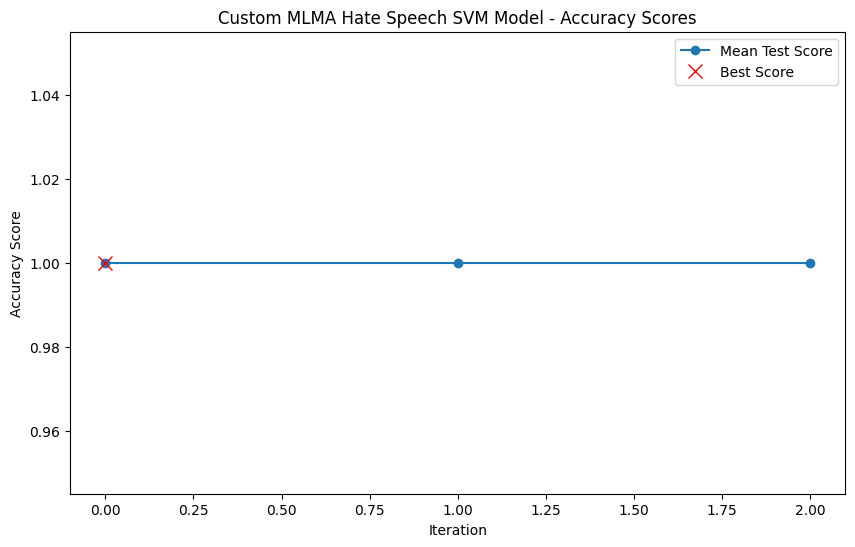

In [373]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_mlma_hate_speech_custom_svm_score_index = np.argmax(mlma_hate_speech_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_mlma_hate_speech_custom_svm_score_index, mlma_hate_speech_custom_svm_grid_search.cv_results_['mean_test_score'][best_mlma_hate_speech_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom MLMA Hate Speech SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [374]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(mlma_hate_speech_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(mlma_hate_speech_custom_svm_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': 0.1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 100}
Best score for SVM with linear kernel and L1 penalty:
1.0


In [375]:
# Train the SVM model with the best parameters
mlma_hate_speech_custom_svm_best_params = mlma_hate_speech_custom_svm_grid_search.best_params_.copy()
mlma_hate_speech_custom_svm_best_params.pop('kernel', None) # Remove the kernel key if it exists
mlma_hate_speech_custom_svm_best_model = svm.LinearSVC(**mlma_hate_speech_custom_svm_best_params, random_state=42)
mlma_hate_speech_custom_svm_best_model.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)

LinearSVC(C=0.1, max_iter=100, random_state=42)

In [376]:
# Use the model to make predictions on the test set
mlma_hate_speech_custom_y_pred = mlma_hate_speech_custom_svm_best_model.predict(mlma_hate_speech_X_test)

# Print the classification report
print("Classification report for MLMA Hate Speech Dataset with L1 regularization:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred))

Classification report for MLMA Hate Speech Dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       585
           1       0.00      0.00      0.00       495
           2       0.00      0.00      0.00       546
           3       0.00      0.00      0.00       570
           4       0.00      0.00      0.00       546
           5       0.00      0.00      0.00       543
           6       0.00      0.00      0.00       530
           7       0.00      0.00      0.00       518
           8       0.00      0.00      0.00       566
           9       0.00      0.00      0.00       533
          10       0.00      0.00      0.00       600
          11       0.00      0.00      0.00       599
          12       0.00      0.00      0.00       545
          13       0.00      0.00      0.00       545
          14       0.00      0.00      0.00       557
          15       0.00      0.00      0.00       559
      

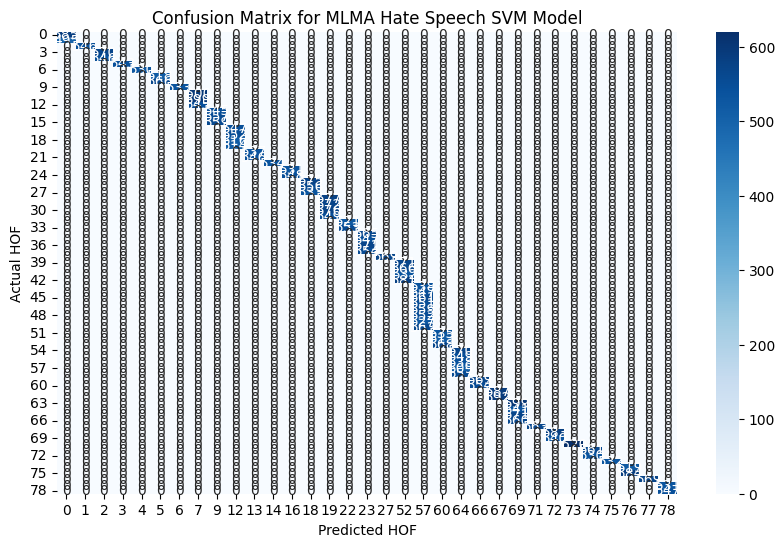

In [377]:
# Plot a heatmap of the predicted vs actual HOF levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred, rownames=['Actual HOF'], colnames=['Predicted HOF']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLMA Hate Speech SVM Model')
plt.show()

In [378]:
# Get the custom model's accuracy and f1-score
mlma_hate_speech_custom_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred)
mlma_hate_speech_custom_f1_score = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {mlma_hate_speech_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {mlma_hate_speech_custom_f1_score}")

Custom SVM Model Accuracy: 0.02589263249388138
Custom SVM Model F1-Score: 0.01782607817768732


In [379]:
svm_classification_results_list.append(("MLMA Hate Speech", "Linear", "L1", mlma_hate_speech_custom_accuracy, mlma_hate_speech_custom_f1_score))

In [380]:
svm_classification_results_list

[('Convabuse', 'Linear', 'L1', 0.5193682955899881, 0.5215577272867292),
 ('Convabuse', 'RBF', 'L2', 0.5080452920143027, 0.46076374809922177),
 ('Convabuse', 'Linear', 'L1', 0.4208382995629718, 0.33189370817472796),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.8368476541908276,
  0.8324315661162446),
 ('Dynamically Generated Hate Speech',
  'RBF',
  'L2',
  0.8377701634159199,
  0.8334301282943788),
 ('Dynamically Generated Hate Speech',
  'Linear',
  'L1',
  0.683974696889826,
  0.655358751115592),
 ('US Elections 2020 Election Hate Speech',
  'Linear',
  'L1',
  0.5207547169811321,
  0.5202016549924369),
 ('US Elections 2020 Election Hate Speech',
  'RBF',
  'L2',
  0.5141509433962265,
  0.349174160935755),
 ('US Elections 2020 Election Hate Speech',
  'Linear',
  'L1',
  0.519811320754717,
  0.5192901159511026),
 ('MLMA Hate Speech',
  'Linear',
  'L1',
  0.02589263249388138,
  0.002164083461464626),
 ('MLMA Hate Speech', 'RBF', 'L2', 0.8008417392895537, 0.744660159

## Support Vector Machine Conclusions

In [381]:
# Convert the svm_results_list to a DataFrame
svm_classification_summary = pd.DataFrame(svm_classification_results_list, columns=["Dataset", "Kernel", "Regularization", "Accuracy", "F1 Score"])
svm_classification_summary

,Dataset,Kernel,Regularization,Accuracy,F1 Score
0,Convabuse,Linear,L1,0.519368,0.521558
1,Convabuse,RBF,L2,0.508045,0.460764
2,Convabuse,Linear,L1,0.420838,0.331894
3,Dynamically Generated Hate Speech,Linear,L1,0.836848,0.832432
4,Dynamically Generated Hate Speech,RBF,L2,0.837770,0.833430
5,Dynamically Generated Hate Speech,Linear,L1,0.683975,0.655359
6,US Elections 2020 Election Hate Speech,Linear,L1,0.520755,0.520202
7,US Elections 2020 Election Hate Speech,RBF,L2,0.514151,0.349174
8,US Elections 2020 Election Hate Speech,Linear,L1,0.519811,0.519290
9,MLMA Hate Speech,Linear,L1,0.025893,0.002164


In [382]:
svm_regression_summary = pd.DataFrame(svm_regression_results_list, columns=["Dataset", "Kernel", "Regularization", "RMSE", "R2"])
svm_regression_summary

,Dataset,Kernel,Regularization,RMSE,R2
0,Online Abusive Attacks,Linear,L1,4.889298,0.899495
1,Online Abusive Attacks,Linear,L1,4.823755,0.902172


In [383]:
svm_classification_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model5_svm-classification-summary.csv", index=False)
svm_regression_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model5_svm-regression-summary.csv", index=False)